In [79]:
import numpy as np
import pandas as pd
import active
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from IPython.display import display
%load_ext autoreload
%autoreload 1
%aimport active

np.set_printoptions(precision=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


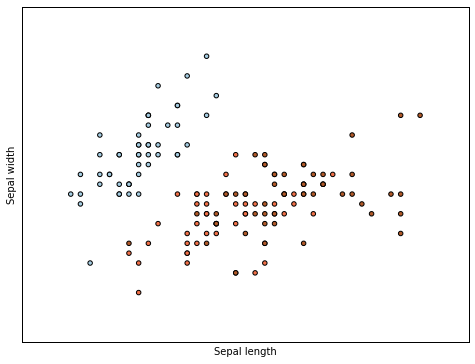

In [80]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [81]:
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
Y[Y==1] = -1
Y[Y==2] = -1
Y[Y==0] = +1

np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

X_iris_training = X[training_index]
Y_iris_training = Y[training_index]
X_iris_testing = X[training_index]
Y_iris_testing = Y[training_index]

In [82]:
def average_accuracy(n, X_testing, Y_testing, 
                     X_training, Y_training, iterations, center='ac', sample=1, M=None):
    testing = 3
    size = X_testing.shape[0]
    lower = np.inf
    upper = -1 * np.inf
    total = 0
    total_correct = 0
    accuracies = []
    for i in range(n):
        active_outcome = \
            active.active(X_training, Y_training, iterations, 
                          center=center, sample=sample, testing=testing, M=M)
        w = active_outcome[0]
        predictions = active.linear_predictor(X_testing, w)
        results = predictions == Y_testing
        correct = np.count_nonzero(results)
        # total_correct = total_correct + correct
        # total = total + X_testing.shape[0]
        accuracy = correct/size
        accuracies.append(accuracy)
        
        n_cp = active_outcome[1]
        if n_cp > upper:
            upper = n_cp
        if n_cp < lower:
            lower = n_cp
        
    # accuracy = total_correct/total
    average_acc = np.sum(accuracies)/n
    return (average_acc, lower, upper)

In [89]:
def experiment(n, test_iter, X_testing, Y_testing, X_training, Y_training,
               iterations, center='ac', sample = 1, M=None, plot=1):
    testing=3
    test_iterations = []
    test_averages = []
    test_lowers = []
    test_uppers = []
    
    for i in range(test_iter):
        i = i + 1
        test_iterations.append(i)
        average_outcome = \
            average_accuracy(n, X_testing, Y_testing, X_training, Y_training, 
                             i, center=center, sample=sample, M=None)
        average = average_outcome[0]
        lower = average_outcome[1]
        upper = average_outcome[2]
        
        test_averages.append(average)
        test_lowers.append(lower)
        test_uppers.append(upper)    
        
    table = pd.DataFrame([test_iterations, test_lowers, 
                          test_uppers, test_averages])
    table = table.transpose()
    table.columns = ['points queried', 'smallest #CPs', 'largest #CPs', 'accuracy']
    display(table)¯
    
    if plot == 1:
        plt.plot(test_iterations, test_averages)
        plt.xlabel('Number of iterations')
        plt.ylabel('Average accuracy over %d tests' % n)
        plt.title('Average accuracy of a cutting plane active learning algorithm')
        plt.show()

In [94]:
def experiment(n, test_iter, X_testing, Y_testing, X_training, Y_training,
               iterations, center='ac', sample = 1, M=None, plot=1):
    testing=3
    test_iterations = []
    test_averages = []
    test_lowers = []
    test_uppers = []
    
    for i in range(test_iter):
        i = i + 1
        test_iterations.append(i)
        average_outcome = \
            average_accuracy(n, X_testing, Y_testing, X_training, Y_training, 
                             i, center=center, sample=sample, M=None)
        average = average_outcome[0]
        lower = average_outcome[1]
        upper = average_outcome[2]
        
        test_averages.append(average)
        test_lowers.append(lower)
        test_uppers.append(upper)    
        
    table = pd.DataFrame([test_iterations, test_lowers, 
                          test_uppers, test_averages])
    table = table.transpose()
    table.columns = ['points queried', 'smallest #CPs', 'largest #CPs', 'accuracy']
    display(table)
    return table


def plot_trace(table):
    plt.plot(table['points queried'], table['accuracy'])
    plt.xlabel('Number of iterations')
    plt.ylabel('Average accuracy over %d tests' % n)
    plt.title('Average accuracy of a cutting plane active learning algorithm')
    plt.show()

,points queried,smallest #CPs,largest #CPs,accuracy
0,1.0,1.0,1.0,0.000000
1,2.0,1.0,1.0,0.680000
2,3.0,1.0,1.0,0.680000
3,4.0,2.0,2.0,0.973333
4,5.0,2.0,2.0,1.000000
5,6.0,2.0,2.0,0.973333
6,7.0,1.0,1.0,0.680000
7,8.0,2.0,2.0,0.973333
8,9.0,1.0,1.0,0.680000
9,10.0,2.0,2.0,0.973333


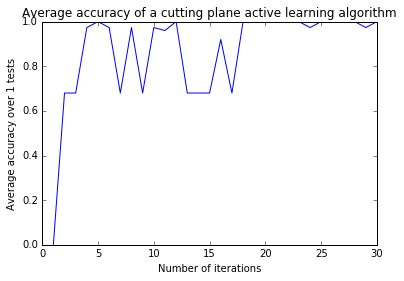

In [96]:
n = 1
test_iter = 30
table = experiment(n, test_iter, X_iris_testing, Y_iris_testing,
           X_iris_training, Y_iris_training,
           iterations, center='ac', sample = 1, M=None, plot=1)
plot_trace(table)

,points queried,smallest #CPs,largest #CPs,accuracy
0,1.0,1.0,1.0,0.000000
1,2.0,1.0,2.0,0.536000
2,3.0,1.0,2.0,0.606400
3,4.0,1.0,2.0,0.628800
4,5.0,1.0,2.0,0.765867
5,6.0,1.0,2.0,0.805867
6,7.0,1.0,2.0,0.755733
7,8.0,1.0,2.0,0.756800
8,9.0,1.0,2.0,0.842133
9,10.0,1.0,2.0,0.815467


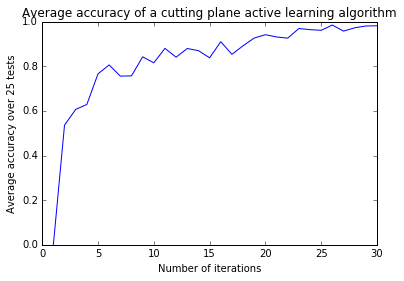

In [90]:
n = 25
test_iter = 30
experiment(n, test_iter, X_iris_testing, Y_iris_testing,
           X_iris_training, Y_iris_training,
           iterations, center='ac', sample = 1, M=None, plot=1)

,points queried,smallest #CPs,largest #CPs,accuracy
0,1.0,0.0,1.0,0.484533
1,2.0,0.0,2.0,0.523467
2,3.0,0.0,2.0,0.588267
3,4.0,0.0,2.0,0.612800
4,5.0,1.0,3.0,0.680533
5,6.0,0.0,3.0,0.733067
6,7.0,0.0,2.0,0.751467
7,8.0,1.0,2.0,0.702400
8,9.0,0.0,3.0,0.704533
9,10.0,1.0,3.0,0.737067


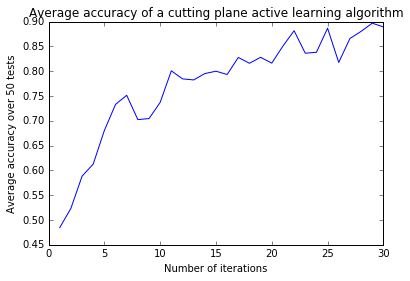

In [92]:
n = 50
test_iter = 30
experiment(n, test_iter, X_iris_testing, Y_iris_testing,
           X_iris_training, Y_iris_training,
           iterations, center='random', sample = 1, M=None, plot=1)

2

In [ ]:
import pandas as pd
import scipy.optimize as opt
from scipy.special import expit # The logistic sigmoid function 

In [131]:
names = ['diabetes', 'num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age']
data = pd.read_csv('diabetes_scale.csv', header=None, names=names)
data['diabetes'].replace(-1, 0, inplace=True) # The target variable need be 1 or 0, not 1 or -1
data['ones'] = np.ones((data.shape[0], 1)) # Add a column of ones
data.head()

,diabetes,num preg,plasma,bp,skin fold,insulin,bmi,pedigree,age,ones
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [132]:
Y = data['diabetes']
X = data[['num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age', 'ones']]

In [133]:
X = np.array(X)
Y = np.array(Y)

In [134]:
Y[Y==0] = -1

In [135]:
X

array([[-0.2941,  0.4874,  0.1803, ..., -0.5312, -0.0333,  1.    ],
       [-0.8824, -0.1457,  0.082 , ..., -0.7669, -0.6667,  1.    ],
       [-0.0588,  0.8392,  0.0492, ..., -0.4927, -0.6333,  1.    ],
       ..., 
       [-0.4118,  0.2161,  0.1803, ..., -0.8574, -0.7   ,  1.    ],
       [-0.8824,  0.2663, -0.0164, ..., -0.7686, -0.1333,  1.    ],
       [-0.8824, -0.0653,  0.1475, ..., -0.7976, -0.9333,  1.    ]])

In [136]:
Y

array([-1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1

In [137]:
np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

In [138]:
X_training = X[training_index]
Y_training = Y[training_index]
X_testing = X[training_index]
Y_testing = Y[training_index]

In [140]:
X_training.shape

(384, 9)

In [139]:
n = 10
iterations = 50
average_accuracy(n, X_testing, Y_testing, 
                 X_training, Y_training, iterations, center='ac', testing=1, sample=1, M=None)

KeyboardInterrupt: 